# Imports

In [1]:
#imports
import networkx as nx
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn import metrics

# Load CSV

In [2]:
#load the csv file
df = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None)
df.columns = ['source', 'target', 'timestamp']

# Preprocressing on csv to get insights from data

In [3]:
# Convert timestamp to datetime format
df['timestamps'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

# Get the year from timestamp and add it to a separate year column
df['year'] = df['timestamps'].dt.year

# Find out the years that the dataset has data for
print("The dataset contains data for years",df.year.unique())
print("The total number of interactions in given database is",df.shape[0])

The dataset contains data for years [2008 2009 2010 2011 2012 2013 2014 2015 2016]
The total number of interactions in given database is 63497050


### Keeping the records of only the year 2016 and removing all others

In [4]:
df_from_2016 = df.loc[df['year'] == 2016]
print("The total number of activity in year 2016 is ",df_from_2016.shape[0])
df_from_2016.head(5)

The total number of activity in year 2016 is  2536530


,source,target,timestamp,timestamps,year
17226995,3877963,4606570,1451606401,2016-01-01 00:00:01,2016
17226996,3539722,2450821,1451606412,2016-01-01 00:00:12,2016
17226997,2502532,5248833,1451606445,2016-01-01 00:00:45,2016
17226998,3829407,5712246,1451606449,2016-01-01 00:00:49,2016
17226999,5199921,2130738,1451606454,2016-01-01 00:00:54,2016


# List of Functions

In [5]:
###################################################################################################################
######################Checks if two arrays are same .Returns true if they are same ##############################
###################################################################################################################
def areTwoArraysSame(arr1, arr2): 
    n=len(arr1)
    m=len(arr2)
    
    # If lengths of array are not  
    # equal means array are not equal 
    if (n != m): 
        return False; 
  
    # Sort both arrays 
    arr1.sort(); 
    arr2.sort(); 
  
    # Linearly compare elements 
    for i in range(0, n - 1): 
        if (arr1[i] != arr2[i]): 
            return False; 
  
    # If all elements were same. 
    return True;


###################################################################################################################
##################### Checks if two matrices are same .Returns true if they are same  #############################
###################################################################################################################
def areSame(A,B):
    status = "true"
    for i in range(len(vertices_of_interest)):
        for j in range(len(vertices_of_interest)):
            if (A[i][j] != B[i][j]):
                status="false" 
    print(status)
    return status

def avgEigenVectors(t):
    print("Function to be defined")
    

###################################################################################################################
##################### Find the Cosine Similarity  #################################################################
###################################################################################################################
def calculateCosineSimilarity(eigenvectorsA, eigenvectorsB):
    metrics.pairwise.cosine_similarity(eigenvectorsA.reshape(1, -1),eigenvectorsB.reshape(1, -1), dense_output=True)[0][0]
    
    
# def findCorrelationMatrixUsingSlidingWindowMethod(input_matrix, window_size_in_days, number_of_vertices, number_of_days_present_in_data):
#     print("The total number of correlation matrices to be created is",number_of_days_present_in_data-window_size+1)
    
#     # initialize the correlation matrices
#     for i in range(number_of_days_present_in_data-window_size+1):
#         exec("correlation_matrix" + str(i) + "= np.zeros((number_of_vertices,number_of_vertices))")

#     # fill the correlation matrices with the correlation values between each pair of nodes.
#     for k in range((number_of_days_present_in_data-window_size+1)):
#         output_matrix_name = "correlation_matrix"+str(k)
#         print("Creating correlation_matrix named",output_matrix_name)
#         for i in range(number_of_vertices):
#             a=np.transpose(input_matrix[k:window_size+k,i:i+1])[0]
#             for j in range(number_of_vertices):
#                 b=np.transpose(input_matrix[k:window_size+k,j:j+1])[0]
#                 if i==j:
#                     corr = 1  
#                 elif areTwoArraysSame(a,b):
#                     corr = 1
#                 else:
#                     corr,p_value = pearsonr(a, b)
#                     if str(corr).lower()=="nan" or str(corr).lower()=="inf":
#                         corr=0
#     #             print("The correlation between", a, "and", b, "is", corr,"at position (",i,j,")")
#                 exec("correlation_matrix" + str(k) + "[i][j]= corr") 

# Create a multi-directed stackOverflow Graph for year 2016

In [6]:
stackOverflowGraph = nx.MultiDiGraph()
    
#create a new dataframe without the timestamp. axis=1 specify to detach the column.axis=0 is for the row
df_without_convertedTimestamp = df_from_2016.drop(['timestamps','year'], axis = 1)

#add edges to the directedGraph
stackOverflowGraph.add_weighted_edges_from(df_without_convertedTimestamp.values.tolist())

print("The total number of nodes are ",stackOverflowGraph.number_of_nodes())
print("The total number of edges are ",stackOverflowGraph.number_of_edges())

The total number of nodes are  435894
The total number of edges are  2536530


#### Find the minimum and maximum out-degree for year 2016

In [7]:
#get degree stat
node_out_degree_stats = stackOverflowGraph.out_degree()

#Sort in a descending order of the degree
sorted_node_out_degree_stats = sorted(node_out_degree_stats, key=lambda x: x[1], reverse=True)

#minimum weighted degree node would be at the last index
min_node_out_degree = sorted_node_out_degree_stats[len(node_out_degree_stats)-1][1]
print("The minimum node out-degree is",min_node_out_degree)

#maximum weighted degree node will be at the zero index
max_node_out_degree = sorted_node_out_degree_stats[0][1]
print("The maximum node out-degree is",max_node_out_degree)

The minimum node out-degree is 0
The maximum node out-degree is 4988


#### Now we need to for a dataframe to store the number of activity performed by each user

In [8]:
df_with_source_and_number_of_interactions=df_from_2016.groupby(['source']).size().reset_index(name='counts')

In [9]:
# let's get an interval of 50 interactions in increasing order as df_with_source_and_number_of_interactions.min()-50, 50-100....., n-df_with_source_and_number_of_interactions.max()
# take 50 vertices from each interval and add those vertices to the vertices of interest aray
vertices_of_interest = []
minimum_interactions =0
maximum_interactions=50
while(maximum_interactions<=5000):
    counter=0;
    number_of_vertex_to_take_from_each_interval=50
    tempdf=df_with_source_and_number_of_interactions
    result=tempdf.loc[(tempdf['counts'] > minimum_interactions) & (tempdf['counts'] <= maximum_interactions)]
    if result.shape[0]>=number_of_vertex_to_take_from_each_interval:
        result=result.head(number_of_vertex_to_take_from_each_interval)
#         print("Number of records to be added to the vertices of interest list is",result.shape[0])
    else:
        number_of_rows=result.shape[0]
        result=result.head(number_of_rows)
#         print("Number of records having interactions",minimum_interactions,"to",maximum_interactions,"is",number_of_rows)     
        # add to the list of vertices of interest
    for vertex in result.source:
#         print("Adding to list the value:",vertex)
        vertices_of_interest.append(vertex)
        counter=counter+1
        if(counter>number_of_vertex_to_take_from_each_interval):
            break
        
    #update the variables
    minimum_interactions=maximum_interactions
    maximum_interactions=maximum_interactions+50

In [59]:
print("We are now left with only",len(vertices_of_interest),"nodes")

We are now left with only 817 nodes


In [11]:
# We need to create an array to hold all the nodes so that we can manipulate them later
nodes_array = np.array(vertices_of_interest)

In [12]:
# Find the out-degree of each nodes and put them in the array
nodes_out_degree_array = np.zeros(len(vertices_of_interest),int)
i=0
for node in vertices_of_interest:
    nodes_out_degree_array[i]=stackOverflowGraph.out_degree(node)
    i=i+1

In [13]:
# Initialize the outdegree matrix to zeros
outdegree_matrix = np.zeros( (65, len(vertices_of_interest)),float) # matrix of rows by column to keep the in-degree
outdegree_matrix[0][0]           

In [ ]:
# # Setting the out-degree to 0.001 so that one value will always be different than 0 when calculating the pearsons correlation
# for i in range(65):
#     for j in range(len(vertices_of_interest)):
#         if i>0:
#             if j>0:
#                 if i%6==0:
#                     outdegree_matrix[i][j]=0.001 
#             elif j==0:
#                 if i%6==0:
#                     outdegree_matrix[i][j]=0.001    

# calculate the out-degree matrix of T*N to compute the degree of each vertex at each day

In [14]:
startTime=1451606400 #jan 1
endTime =  1457222400 #march 7
anchorTime=startTime
i=0;
while(anchorTime < endTime):
    print(i)
    tempGraph=nx.MultiDiGraph()
    anchorTime=anchorTime+86400
    # a df with only records from vertices of interest
#     tempdf.loc[(tempdf['counts'] > minimum_interactions) & (tempdf['counts'] <= maximum_interactions)]
    temp_df1 = df_without_convertedTimestamp[(df_without_convertedTimestamp['source'].isin(vertices_of_interest))]
    temp_df = temp_df1.ix[(temp_df1['timestamp']<anchorTime)]
    tempGraph.add_edges_from(temp_df.values.tolist())
#     print("The number of nodes and edges at i=",i,"is",tempGraph.number_of_nodes(),tempGraph.number_of_edges())
    for j in range(len(vertices_of_interest)):
        if(nodes_array[j] in tempGraph.nodes()):
            outdegree_matrix[i][j]=tempGraph.out_degree(nodes_array[j])
#             print("Matrix[",i,"][",j,"] :",outdegree_matrix[i][j])
    i=i+1; 

0


/home/aaa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


# Time to find the Correlation Matrices

In [17]:
# Finds CorrelationMatrix Using Sliding Window Method
window_size = 7 
number_of_vertices =  len(vertices_of_interest)
input_matrix = outdegree_matrix
number_of_days_present_in_data = 65 #January 1,2016 to March 6,2016

print("The total number of correlation matrices to be created is",number_of_days_present_in_data-window_size+1)
    
# initialize the correlation matrices
for i in range(number_of_days_present_in_data-window_size+1):
    exec("correlation_matrix" + str(i) + "= np.zeros((number_of_vertices,number_of_vertices))")

# fill the correlation matrices with the correlation values between each pair of nodes.
for k in range((number_of_days_present_in_data-window_size+1)):
    output_matrix_name = "correlation_matrix"+str(k)
    print("Creating correlation_matrix named",output_matrix_name)
    for i in range(number_of_vertices):
        a=np.transpose(input_matrix[k:window_size+k,i:i+1])[0]
        for j in range(number_of_vertices):
            b=np.transpose(input_matrix[k:window_size+k,j:j+1])[0]
            if i==j:
                corr = 1  
            elif areTwoArraysSame(a,b):
                corr = 1
            else:
                corr,p_value = pearsonr(a, b)
                if str(corr).lower()=="nan" or str(corr).lower()=="inf":
                    corr=0
    #           print("The correlation between", a, "and", b, "is", corr,"at position (",i,j,")")
            exec("correlation_matrix" + str(k) + "[i][j]= corr")  


The total number of correlation matrices to be created is 59
Creating correlation_matrix named correlation_matrix0


/home/aaa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Creating correlation_matrix named correlation_matrix1
Creating correlation_matrix named correlation_matrix2
Creating correlation_matrix named correlation_matrix3
Creating correlation_matrix named correlation_matrix4
Creating correlation_matrix named correlation_matrix5
Creating correlation_matrix named correlation_matrix6
Creating correlation_matrix named correlation_matrix7
Creating correlation_matrix named correlation_matrix8
Creating correlation_matrix named correlation_matrix9
Creating correlation_matrix named correlation_matrix10
Creating correlation_matrix named correlation_matrix11
Creating correlation_matrix named correlation_matrix12
Creating correlation_matrix named correlation_matrix13
Creating correlation_matrix named correlation_matrix14
Creating correlation_matrix named correlation_matrix15
Creating correlation_matrix named correlation_matrix16
Creating correlation_matrix named correlation_matrix17
Creating correlation_matrix named correlation_matrix18
Creating correlatio

## Function to calculate the principal eigen vector

In [18]:
###################################################################################################################
############################# Calculates and returns principal EigenVectors for an input matrix  ############################
###################################################################################################################
def giveEigenVectors(given_input_matrix):
#     print("The input correlation matrix is ", given_input_matrix)
    eigenvalues, eigenvectors = np.linalg.eig(given_input_matrix)
    return eigenvectors[:, eigenvalues.argmax()]

## Finding the principal eigen vector for all the correlation matrices

In [20]:
for i in range(number_of_days_present_in_data-window_size+1):
    corr_matrix = "correlation_matrix"+str(i)
    print("Finding the eigen vector for",corr_matrix)
    exec("eigen_vector" + str(i) + "= giveEigenVectors(correlation_matrix" + str(i)+")") 

Finding the eigen vector for correlation_matrix0
Finding the eigen vector for correlation_matrix1
Finding the eigen vector for correlation_matrix2
Finding the eigen vector for correlation_matrix3
Finding the eigen vector for correlation_matrix4
Finding the eigen vector for correlation_matrix5
Finding the eigen vector for correlation_matrix6
Finding the eigen vector for correlation_matrix7
Finding the eigen vector for correlation_matrix8
Finding the eigen vector for correlation_matrix9
Finding the eigen vector for correlation_matrix10
Finding the eigen vector for correlation_matrix11
Finding the eigen vector for correlation_matrix12
Finding the eigen vector for correlation_matrix13
Finding the eigen vector for correlation_matrix14
Finding the eigen vector for correlation_matrix15
Finding the eigen vector for correlation_matrix16
Finding the eigen vector for correlation_matrix17
Finding the eigen vector for correlation_matrix18
Finding the eigen vector for correlation_matrix19
Finding th

# Finding the similarity between eigen-vectors 

In [75]:
# initialization
number_of_rows = eigen_vector0.reshape(-1,1).shape[0]
number_of_columns =  eigen_vector0.reshape(-1,1).shape[1]
cosine_similarity_score_upto_day_d = np.zeros((59),float) # array to store the similarity score for each T and (T-1)
cosine_similarity_score_upto_day_d[0] = 1

for j in range(59): # j represents the window number
    if j != 0:
        sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
        average = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
        for i in range(j):
            exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
        average  = np.divide(sum_element_wise, j)
        exec("cosine_similarity_score_upto_day_d[j] = metrics.pairwise.cosine_similarity(average.reshape(1,-1),eigen_vector"+str(j)+".reshape(1,-1), dense_output=True)")

/home/aaa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


# Dataframe of similarity score at each window number in ascending order of similarity

In [76]:
cols = ['Window Number', 'Similarity score']
lst = []
for i in range(len(cosine_similarity_score_upto_day_d)):
    index = i
    similarity_score = cosine_similarity_score_upto_day_d[i]    
    lst.append([index, similarity_score])
similarity_score_df = pd.DataFrame(lst, columns=cols)
similarity_score_df.sort_values('Similarity score')

,Window Number,Similarity score
2,2,-0.997562
5,5,-0.993489
13,13,-0.989311
7,7,-0.988704
27,27,-0.987018
41,41,-0.981830
14,14,-0.980342
28,28,-0.978364
33,33,-0.976684
46,46,-0.976243


###### At window number 18, cosine similarity value is the least positive. Therefore, a week January 19 to January 25 has the anomalous activity. Now, let's plot the average of the eigen-vectors upto window number =18 against eigenvector at window number=18 and see the plot. If both of them are similar, they will have a straight line passing through the origin.

/home/aaa/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


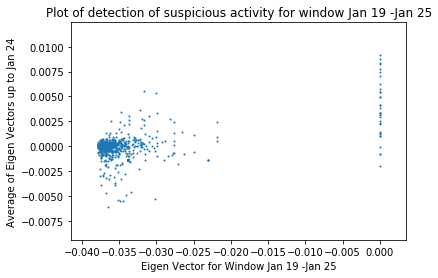

In [112]:
window_number=18
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average18 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average18  = np.divide(sum_element_wise, window_number)
plt.scatter(eigen_vector18.reshape(-1,1),average18.reshape(-1,1),s=1)
plt.xlabel("Eigen Vector for Window Jan 19 -Jan 25")
plt.ylabel("Average of Eigen Vectors up to Jan 24")
plt.title("Plot of detection of suspicious activity for window Jan 19 -Jan 25")
plt.show()

## Calculating the difference between the vectors to see which node contribute the most for the abnormal plot and arrange them in descending order of their total change so that the top contributing nodes appears on the top and show the top 10 users

In [101]:
average18_r = average18.real # get the real values
eigen_vector18_r = eigen_vector18.real # get the real values
diff_18 = abs(np.subtract(average18_r[0], eigen_vector18_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)):
    index = i
    different_score = diff_18[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_18 = pd.DataFrame(lst, columns=cols)
diff_df_18.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
474,1209018,0.042934
485,2020002,0.042552
41,232,0.042190
250,1441,0.042056
54,1942,0.041591
30,184,0.041205
172,135105,0.040848
137,78496,0.040023
21,112,0.039549
446,2218597,0.039317


## Repeating the same process for top 5 windows where least cosine similarity was seen to find the top 10 users

### Top 10 predicted malacious users at window number 2

In [100]:
window_number=2
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average2 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average2  = np.divide(sum_element_wise, window_number)

average2_r = average2.real # get the real values
eigen_vector2_r = eigen_vector2.real # get the real values
diff_2 = abs(np.subtract(average2_r[0], eigen_vector2_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)): 
    index = i
    different_score = diff_2[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_2 = pd.DataFrame(lst, columns=cols)
diff_df_2.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
745,1766831,0.063856
770,330315,0.063855
215,97337,0.063825
636,5202563,0.063820
526,3297613,0.063782
650,2606013,0.063758
726,4604579,0.063756
128,50447,0.063751
559,1593860,0.063750
576,5067311,0.063747


### Top 10 predicted malacious users at window number 5

In [102]:
window_number=5
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average5 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average5  = np.divide(sum_element_wise, window_number)

average5_r = average5.real # get the real values
eigen_vector5_r = eigen_vector5.real # get the real values
diff_5 = abs(np.subtract(average5_r[0], eigen_vector5_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)): 
    index = i
    different_score = diff_5[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_5 = pd.DataFrame(lst, columns=cols)
diff_df_5.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
636,5202563,0.050057
579,5535245,0.049963
774,6309,0.049959
650,2606013,0.049948
779,2802040,0.049920
815,3832970,0.049918
581,7432,0.049917
750,1832058,0.049916
692,4573247,0.049912
770,330315,0.049910


### Top 10 predicted malacious users at window number 13

In [103]:
window_number=13
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average13 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average13  = np.divide(sum_element_wise, window_number)

average13_r = average13.real # get the real values
eigen_vector13_r = eigen_vector13.real # get the real values
diff_13 = abs(np.subtract(average13_r[0], eigen_vector13_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)): 
    index = i
    different_score = diff_13[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_13 = pd.DataFrame(lst, columns=cols)
diff_df_13.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
96,28804,0.049215
87,21475,0.048619
523,2976878,0.048557
105,7585,0.048411
650,2606013,0.048182
636,5202563,0.048169
782,1743880,0.048166
579,5535245,0.048147
647,2204926,0.048143
733,5044042,0.048125


### Top 10 predicted malacious users at window number 7

In [104]:
window_number=7
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average7 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average7  = np.divide(sum_element_wise, window_number)

average7_r = average7.real # get the real values
eigen_vector7_r = eigen_vector7.real # get the real values
diff_7 = abs(np.subtract(average7_r[0], eigen_vector7_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)): 
    index = i
    different_score = diff_7[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_7 = pd.DataFrame(lst, columns=cols)
diff_df_7.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
636,5202563,0.049170
523,2976878,0.049134
579,5535245,0.049106
774,6309,0.049102
815,3832970,0.049081
537,13302,0.049071
580,4279,0.049067
692,4573247,0.049066
112,16587,0.049061
779,2802040,0.049054


### Top 10 predicted malacious users at window number 27

In [105]:
window_number=27
sum_element_wise = np.zeros((number_of_rows),complex) # stores sum of the eigen vectors element wise
average27 = np.zeros((number_of_rows),complex) # stores average of the eigen vectors
for i in range(window_number):
    exec("sum_element_wise = np.add(sum_element_wise, eigen_vector"+str(i)+".reshape(1,-1))")
average27  = np.divide(sum_element_wise, window_number)

average27_r = average27.real # get the real values
eigen_vector27_r = eigen_vector27.real # get the real values
diff_27 = abs(np.subtract(average27_r[0], eigen_vector27_r[0])) 

cols = ['Stack Overflow user ids', 'difference_in_score']
lst = []
for i in range(len(vertices_of_interest)): 
    index = i
    different_score = diff_27[i]
    lst.append([vertices_of_interest[index], different_score])
diff_df_27 = pd.DataFrame(lst, columns=cols)
diff_df_27.sort_values('difference_in_score',ascending=False).head(10)

,Stack Overflow user ids,difference_in_score
366,467968,0.045640
717,4248328,0.044919
470,982161,0.044849
64,9204,0.044588
577,5104596,0.044536
66,10431,0.044095
404,131872,0.044092
651,3510736,0.043924
493,2649661,0.043885
342,1116364,0.043793
